# Image Processing

In this notebook, we'll demonstrate how to use `sunpy` and several SunPy affiliated packages to do some basic image processing and 

#### Resample

In [ ]:
m_aia.scale

Let's resample our cropped AIA map to the resolution of the EUI map

In [ ]:
m_eui.scale

In [ ]:
extent_x, extent_y = m_aia_cropped.scale.axis1 * m_aia_cropped.dimensions.x, m_aia_cropped.scale.axis2 * m_aia_cropped.dimensions.y

In [ ]:
new_dimensions = u.Quantity([extent_x / m_eui.scale.axis1, extent_y / m_eui.scale.axis2])

In [ ]:
m_aia_resampled = m_aia_cropped.resample(new_dimensions)

In [ ]:
m_aia_resampled.dimensions

In [ ]:
m_aia_resampled.scale

Let's compare our original and resampled images.

In [ ]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121, projection=m_aia_cropped)
m_aia_cropped.plot(axes=ax,vmin=0,vmax=2e2, title='Original')
ax = fig.add_subplot(122, projection=m_aia_resampled)
m_aia_resampled.plot(axes=ax,vmin=0,vmax=2e2, title='Resampled')

## Correcting for Instrument Degradation with `aiapy`

## Map Arithmetic

Note above that unlike the AIA and STEREO maps, the EUI map has been normalized to the exposure time as part of the promotion to a L2 data product.
We can easily apply this exposure time normalization ot the AIA and STEREO maps as well.

In [17]:
m_aia.exposure_time

<Quantity 2.900821 s>

In [18]:
m_stereo.exposure_time

<Quantity 4.00208 s>

`Map` allows you to perform basic unit-aware arithmetic on the object directly.

In [19]:
m_aia_norm = m_aia / m_aia.exposure_time

In [20]:
m_aia_norm.unit

Unit("ct / s")

In [21]:
m_stereo_norm = m_stereo / m_stereo.exposure_time

In [22]:
m_stereo_norm.unit

Unit("ct / s")

You can also do more complex things like subtract an entire array from a previous timestep to create a difference map.

In [35]:
m_stereo_diff = m_stereo - sunpy.map.Map(stereo_files[0]).quantity

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


Observatory,STEREO A
Instrument,SECCHI
Detector,EUVI
Measurement,304.0 Angstrom
Wavelength,304.0 Angstrom
Observation Date,2022-02-15 22:15:45
Exposure Time,4.00208 s
Dimension,[2048. 2048.] pix
Coordinate System,helioprojective
Scale,[1.58777404 1.58777404] arcsec / pix
Reference Pixel,[1024.69 1124.64] pix

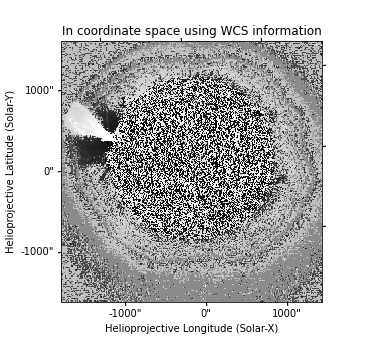
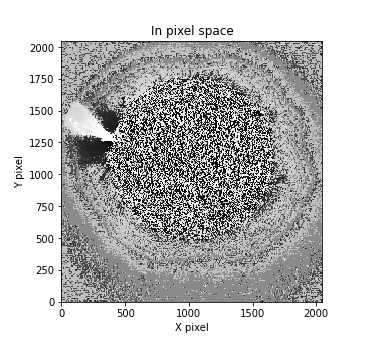
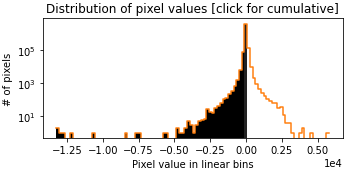
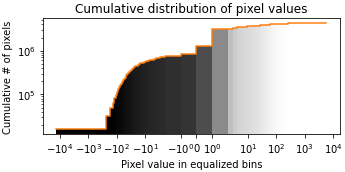

In [36]:
m_stereo_diff

## Using MGN Sharpening

Use this on the AIA data to bring out some of the structure off limb

## Stacking Images into an NDCube